# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 11.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
431302,0.0024,0.0024,0.0024,0.0024,0.0024,0.0488,0.0879,0.0146,0.0024,0.0049,0,0,0,0
153309,0.0244,0.0024,0.0024,0.0024,0.0024,0.0098,0.5322,0.0488,0.0024,0.9961,3,0,7,0
104546,0.0024,0.0024,0.2466,0.0732,0.0024,0.0195,0.4492,0.1245,0.1660,0.3394,0,0,0,0
9285,0.0049,0.6348,0.1904,0.1733,0.0024,0.0024,0.8228,0.2246,0.3442,0.5908,0,1,0,2
409348,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2759,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(471954, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471954 entries, 0 to 471953
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471954 non-null  float64
 1   Emg2          471954 non-null  float64
 2   Emg3          471954 non-null  float64
 3   Emg4          471954 non-null  float64
 4   Emg5          471954 non-null  float64
 5   Emg6          471954 non-null  float64
 6   Emg7          471954 non-null  float64
 7   Emg8          471954 non-null  float64
 8   Emg9          471954 non-null  float64
 9   Emg10         471954 non-null  float64
 10  repetition    471954 non-null  int64  
 11  rerepetition  471954 non-null  int64  
 12  stimulus      471954 non-null  int64  
 13  restimulus    471954 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.000000,471954.00000,471954.000000,471954.000000,471954.000000
mean,0.013238,0.124466,0.208024,0.141833,0.015772,0.059688,0.636016,0.367091,0.206164,0.431468,3.12302,2.421774,5.533450,4.205899
std,0.020766,0.298463,0.377703,0.343489,0.043786,0.115154,0.753703,0.530722,0.399797,0.639627,3.47991,3.343693,6.566056,6.198330
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.112300,0.083000,0.002400,0.019500,0.00000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.026900,0.002400,0.002400,0.022000,0.407700,0.173300,0.014600,0.207500,2.00000,0.000000,3.000000,0.000000
75%,0.014600,0.087900,0.271000,0.134300,0.004900,0.068400,0.869100,0.407700,0.258800,0.576200,6.00000,5.000000,10.000000,8.000000
max,0.439500,4.668000,4.660600,4.665500,1.008300,2.297400,4.668000,4.668000,4.663100,4.665500,10.00000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204010
12     15511
2      15503
4      15497
7      15497
8      15487
5      15459
9      15459
6      15456
11     15450
1      15421
10     15415
3      15414
14     10334
17     10327
13     10324
15     10290
16     10246
21      5165
18      5161
19      5161
22      5125
20      5121
23      5121
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

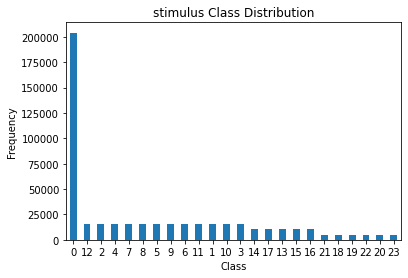

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
234176,0.0562,0.4077,0.1636,0.2954,0.0024,0.0464,1.4697,0.3882,0.4102,0.9351,9,9,16,16
327568,0.0024,0.0293,0.0024,0.0024,0.0098,0.0879,0.9839,0.5371,0.0024,0.3174,1,1,10,10
414614,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.4077,0.3442,0.0024,0.0952,6,6,19,19
455383,0.0024,1.0938,0.2588,0.0806,0.1245,0.1807,1.1719,4.4189,0.2246,0.9790,5,5,22,22
223205,0.0317,0.0024,0.0024,0.0024,0.0024,0.1123,1.6821,0.3662,0.0122,1.2183,6,6,15,15


In [12]:
raw_data.shape

(398483, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398483 entries, 0 to 471953
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          398483 non-null  float64
 1   Emg2          398483 non-null  float64
 2   Emg3          398483 non-null  float64
 3   Emg4          398483 non-null  float64
 4   Emg5          398483 non-null  float64
 5   Emg6          398483 non-null  float64
 6   Emg7          398483 non-null  float64
 7   Emg8          398483 non-null  float64
 8   Emg9          398483 non-null  float64
 9   Emg10         398483 non-null  float64
 10  repetition    398483 non-null  int64  
 11  rerepetition  398483 non-null  int64  
 12  stimulus      398483 non-null  int64  
 13  restimulus    398483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 45.6 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree Classifier

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 83.60038646373138


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     39628
           1       0.78      0.78      0.78      2491
           2       0.75      0.74      0.74      2634
           3       0.80      0.78      0.79      2229
           4       0.82      0.81      0.81      2256
           5       0.73      0.72      0.73      2081
           6       0.77      0.77      0.77      2297
           7       0.73      0.72      0.72      2369
           8       0.73      0.73      0.73      2312
           9       0.72      0.72      0.72      2453
          10       0.77      0.76      0.77      2114
          11       0.73      0.73      0.73      2359
          12       0.73      0.74      0.74      2139
          13       0.71      0.70      0.71      1545
          14       0.61      0.61      0.61      1498
          15       0.64      0.64      0.64      1513
          16       0.78      0.76      0.77      1601
 

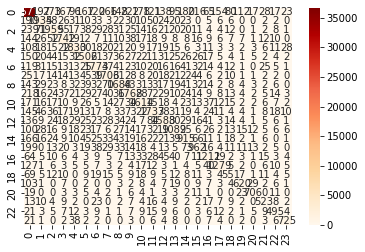

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.215064557009674
MSE: 13.640802037717856
RMSE: 3.693345642871495


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8357162140264018
Recall Score :  0.8360038646373138
f1_score :  0.8358459103011587


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 94.65099062699977


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     39628
           1       0.96      0.97      0.97      2491
           2       0.94      0.92      0.93      2634
           3       0.96      0.96      0.96      2229
           4       0.98      0.96      0.97      2256
           5       0.93      0.91      0.92      2081
           6       0.95      0.94      0.95      2297
           7       0.89      0.88      0.88      2369
           8       0.94      0.93      0.93      2312
           9       0.94      0.94      0.94      2453
          10       0.95      0.94      0.94      2114
          11       0.96      0.95      0.96      2359
          12       0.94      0.93      0.93      2139
          13       0.93      0.92      0.93      1545
          14       0.88      0.83      0.86      1498
          15       0.85      0.81      0.83      1513
          16       0.96      0.94      0.95      1601
 

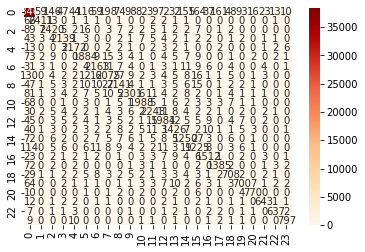

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.4759777657879218
MSE: 6.040930022460068
RMSE: 2.4578303485920396


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9462378805624551
Recall Score :  0.9465099062699976
f1_score :  0.9462881835101971


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.962131573334


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     39628
           1       0.94      0.95      0.94      2491
           2       0.96      0.88      0.92      2634
           3       0.98      0.91      0.94      2229
           4       0.99      0.92      0.96      2256
           5       0.95      0.86      0.90      2081
           6       0.97      0.92      0.95      2297
           7       0.90      0.85      0.88      2369
           8       0.94      0.90      0.92      2312
           9       0.94      0.90      0.92      2453
          10       0.97      0.92      0.94      2114
          11       0.96      0.89      0.93      2359
          12       0.95      0.88      0.92      2139
          13       0.94      0.88      0.91      1545
          14       0.92      0.81      0.86      1498
          15       0.88      0.77      0.82      1513
          16       0.95      0.92      0.94      1601
 

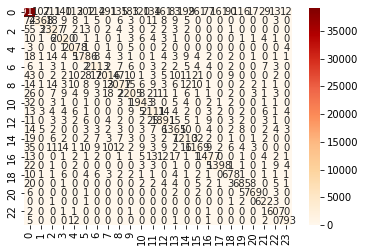

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5126165351267927
MSE: 6.274615104709086
RMSE: 2.5049181832365477


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9402310457969242
Recall Score :  0.9396213157333401
f1_score :  0.9388595491802666


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 93.06247412073228


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     39628
           1       0.92      0.93      0.92      2491
           2       0.94      0.87      0.90      2634
           3       0.97      0.89      0.93      2229
           4       0.99      0.91      0.95      2256
           5       0.94      0.84      0.89      2081
           6       0.95      0.90      0.93      2297
           7       0.89      0.85      0.87      2369
           8       0.91      0.88      0.90      2312
           9       0.92      0.88      0.90      2453
          10       0.95      0.90      0.92      2114
          11       0.95      0.88      0.91      2359
          12       0.93      0.87      0.90      2139
          13       0.92      0.87      0.89      1545
          14       0.89      0.79      0.84      1498
          15       0.85      0.76      0.80      1513
          16       0.94      0.90      0.92      1601
 

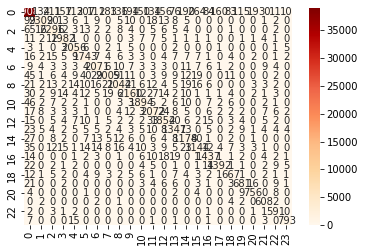

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.5593435135575994
MSE: 6.67483092211752
RMSE: 2.5835694149988537


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9307993798259827
Recall Score :  0.9306247412073227
f1_score :  0.9296807120919693


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 92.29707517221476


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     39628
           1       0.89      0.91      0.90      2491
           2       0.91      0.86      0.88      2634
           3       0.94      0.90      0.92      2229
           4       0.96      0.91      0.93      2256
           5       0.90      0.84      0.87      2081
           6       0.93      0.89      0.91      2297
           7       0.87      0.84      0.85      2369
           8       0.89      0.87      0.88      2312
           9       0.89      0.87      0.88      2453
          10       0.92      0.89      0.91      2114
          11       0.91      0.88      0.89      2359
          12       0.90      0.85      0.87      2139
          13       0.90      0.85      0.87      1545
          14       0.86      0.79      0.82      1498
          15       0.81      0.76      0.79      1513
          16       0.92      0.90      0.91      1601
 

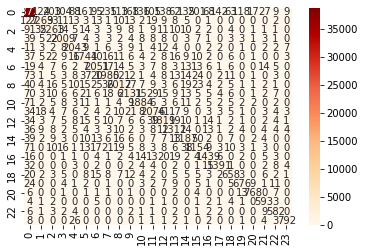

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.5915404594903196
MSE: 6.896194336047781
RMSE: 2.626060611647755


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9222804854657275
Recall Score :  0.9229707517221476
f1_score :  0.9221672496402062
